## Chinese Movie Reviews and Ratings

In [1]:
#!/usr/bin/python

#read .db file and store rating and content in lists
import sqlite3
from sqlite3 import Error

# create a database connection
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

#creat database path
database = "douban.db"
#connect database
conn = create_connection(database)

In [2]:
with conn:
    """
    Query all rows in the comment table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    #select rating, content from the table comment, and limit the rating within 1,2,3,4,5
    cur.execute("SELECT RATING, CONTENT FROM comment WHERE RATING IN (1,2,3,4,5)")
    #store ratings and content in the lst
    rows = cur.fetchall()
    
    print("print rows[10]: ", rows[10])

    #store the rating and content from the .db file to lists
    rating = []
    content = []
    for row in rows:
        rating.append(row[0])
        content.append(row[1]) 

print rows[10]:  (2, '这种怪兽灾难人祸片的一切都似曾相识，特效看的头晕脑胀，如果没有嘈杂的背景音乐或许能够惊悚一点。')


In [3]:
print("length of the list rating: ", len(rating))
print("length of the list content: ", len(content))
print("print the 10th element: ", rating[10],content[10])

length of the list rating:  403946
length of the list content:  403946
print the 10th element:  2 这种怪兽灾难人祸片的一切都似曾相识，特效看的头晕脑胀，如果没有嘈杂的背景音乐或许能够惊悚一点。


In [4]:
#create stopwords list
def get_custom_stopwords(stop_words_file):
    #open the file
    stopwords = ''
    with open(stop_words_file, encoding= 'utf-8') as f:
        stopwords = f.read()
    #split with new line
    stopwords_list = stopwords.split('\n')
    #put into the list of stopwords
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

stop_words_file = "stopwordsHIT.txt"
stopwords = get_custom_stopwords(stop_words_file)

In [5]:
print(stopwords[-10:])

['呗', '咚', '咦', '喏', '啐', '喔唷', '嗬', '嗯', '嗳', '']


In [6]:
#segmentation
seg_content = []

import jieba

for i in content:
    outstr = ""
    #segment each comment
    seg = jieba.cut(i, cut_all=False, HMM=True)
    #iterate the comment and check if it contains stopwords
    for word in seg:
        #if the word is not a stopword, attach it to string outstr
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    #append all strings (segmented comments) in a list            
    seg_content.append(outstr)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/01/qvqsfjbj5hl0sr_51g22pvv00000gn/T/jieba.cache
Loading model cost 0.800 seconds.
Prefix dict has been built succesfully.


In [7]:
print("length of seg_content: " , len(seg_content))
print("print the seg_content[:5]:" , seg_content[:5])

length of seg_content:  403946
print the seg_content[:5]: ['弱到 爆 … 剧情 氛围 烘托 表演 服化 道 特效 统统 弱到 爆 女主 哥哥 转折 超级 无力 女主 默默 烫发 表现 阶段性 转折 醉 … 小 迅猛 龙 看起来 狗 以外 真是 … 吐槽 无力 ', '傻 逼 电影 看 怀旧 份儿 上 两星 半 不能 更 … … 一蟹 一蟹 ', '这片 存在 意义 难道 告诉 22 年 过去 人类 商业片 方面 都 处于 停滞不前 倒退 状况 无论是 气氛 渲染 场面 调度 表现 人文 关怀 人性 冲突 体现 都 比不上 22 年前 侏罗纪 公园 侏罗纪 公园 经典 名作 侏罗纪 世界 只会 早早 人 遗忘 不值一提 ', '史诗 级 暴虐 烂片 ', 'jb 玩意儿 反智 今时 今日 ']


In [8]:
#tokenization
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [9]:
max_words = 10000

#only use the most frequent 10000 words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(seg_content)
#turn text to sequences
sequences = tokenizer.texts_to_sequences(seg_content)

In [10]:
print("type of sequences: " , type(sequences))
print("print sequences[:1]" , sequences[:1])

print("length of sequences:")
for sequence in sequences[:100]:
  print(len(sequence))

type of sequences:  <class 'list'>
print sequences[:1] [[610, 6, 19, 771, 3991, 90, 1354, 188, 5602, 610, 141, 1475, 1996, 419, 1090, 141, 2892, 208, 1996, 2304, 6, 65, 8873, 2772, 582, 869, 1685, 39, 6, 1209, 1090]]
length of sequences:
31
12
42
4
3
16
9
6
5
5
15
1
27
9
6
3
0
42
6
51
13
4
16
6
4
21
44
7
2
6
21
14
10
15
17
21
15
4
25
38
39
23
2
14
1
6
4
6
7
27
7
19
11
7
4
0
2
7
48
3
18
0
2
9
3
13
7
4
21
7
24
3
31
6
33
4
31
8
13
7
16
33
17
17
9
5
21
7
7
16
41
14
2
4
12
10
13
10
3
7


In [11]:
maxlen = 30

#make all sequences the same length
data = pad_sequences(sequences, maxlen=maxlen)

In [12]:
print(data)

[[   6   19  771 ...    6 1209 1090]
 [   0    0    0 ...   42    6    6]
 [3210 7076 5829 ...    7 3080 9457]
 ...
 [   0    0    0 ... 2113 4571 3717]
 [   0    0    0 ...  138   46 3010]
 [   0    0    0 ...    0    0  647]]


In [13]:
#save words and their sequences in a dictionary
word_index = tokenizer.word_index

In [14]:
#labels to one hot
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
labels = encoder.fit_transform(rating)

print("print labels:" , labels)


print labels: [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [15]:
#shuffle data and labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [16]:
#split data into trian, test, validation
from sklearn.model_selection import train_test_split
X_train_data, X_test, y_train_data, y_test = train_test_split(data, labels, test_size=0.3, random_state = 42)

training_samples = int(len(X_train_data) * .8)
validation_samples = len(X_train_data) - training_samples

X_train = X_train_data[:training_samples]
y_train = y_train_data[:training_samples]
X_valid = X_train_data[training_samples: training_samples + validation_samples]
y_valid = y_train_data[training_samples: training_samples + validation_samples]

In [17]:
#word embedding
from gensim.models import KeyedVectors
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

In [18]:
#print a vector
print(zh_model.vectors[0])

#print the first 5 words
print(list(iter(zh_model.vocab))[:5])

#print the total dimensions
print(len(zh_model[next(iter(zh_model.vocab))]))

[ 8.6988e-02  9.1123e-02  3.0722e-02  3.4160e-03  2.7568e-02  5.4995e-03
  1.0905e-01  4.9999e-02 -1.9161e-01  4.2729e-02  1.3284e-01 -4.2997e-02
  4.4196e-02 -4.6042e-02  5.2395e-02 -1.3002e-01  1.1440e-01 -1.5359e-01
  5.7565e-02  1.3344e-01 -6.4197e-02  5.3679e-02  1.3349e-01  6.1268e-02
 -2.4911e-03  1.9382e-01  4.4253e-02 -2.0858e-02 -8.0714e-02  1.0053e-01
  5.8553e-02  6.3155e-02 -2.9961e-02 -3.1906e-02  5.6153e-02  5.1014e-02
  1.0752e-01 -7.4407e-02  9.1990e-02  1.7744e-01 -5.9959e-02  1.4046e-01
 -8.0201e-02  4.3989e-02 -9.5205e-02  1.3022e-02  9.1900e-02  2.4317e-02
 -7.0992e-02 -1.5179e-01 -3.0031e-02  1.0344e-01 -5.8155e-02  3.5950e-02
 -5.5085e-02  4.7587e-02 -1.4251e-01 -1.3986e-01 -1.3891e-01  6.9042e-03
  9.0945e-02 -5.5156e-02  6.8180e-02  1.1948e-01  7.8577e-03  1.0014e-01
 -4.2805e-02  2.2362e-01 -2.6212e-02 -3.5302e-02 -6.2687e-03 -1.0843e-01
  1.0872e-01  2.8890e-02 -3.5473e-03 -1.9498e-01 -7.5138e-02  8.5332e-03
 -1.0061e-01 -1.7855e-02 -1.5515e-01  5.3034e-02  5

In [19]:
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])
#build a random matrix
embedding_matrix = np.random.rand(max_words, embedding_dim)
print(embedding_matrix.shape)

#a formula to turn the numbers to the range between -1 and 1
embedding_matrix = (embedding_matrix - 0.5) * 2

(10000, 300)


In [20]:
for word, i in word_index.items():
    if i < max_words:
        try:
            #if the word is in the zh.vec, change the randomly generated vector to the vector retrieved from zh.vec
            embedding_vector = zh_model.get_vector(word)
            embedding_matrix[i] = embedding_vector
        #if the word is not in the zh.vec, still use our randomly generated vector
        except:
            pass

In [21]:
from keras.models import Sequential
from keras import models
from keras import layers
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

def build_model():
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim))
    model.add(LSTM(units))
    model.add(Dense(5, activation='softmax'))
    model.summary()

    #add our embedding matrix to the embedding layer
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = False

    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

    return model

model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 3,042,789
Trainable params: 3,042,789
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train,
                    epochs=4,
                    batch_size=64,
                    validation_data=(X_valid, y_valid))
model.save("mymodel.h5")

Instructions for updating:
Use tf.cast instead.
Train on 226209 samples, validate on 56553 samples
Epoch 1/4
226209/226209 [==============================] - 101s 444us/step - loss: 1.1328 - acc: 0.4990 - val_loss: 1.0655 - val_acc: 0.5319
Epoch 2/4
226209/226209 [==============================] - 93s 411us/step - loss: 1.0396 - acc: 0.5476 - val_loss: 1.0320 - val_acc: 0.5493
Epoch 3/4
226209/226209 [==============================] - 93s 413us/step - loss: 1.0053 - acc: 0.5642 - val_loss: 1.0206 - val_acc: 0.5542
Epoch 4/4
226209/226209 [==============================] - 94s 417us/step - loss: 0.9845 - acc: 0.5748 - val_loss: 1.0179 - val_acc: 0.5567


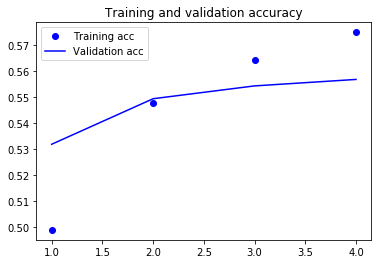

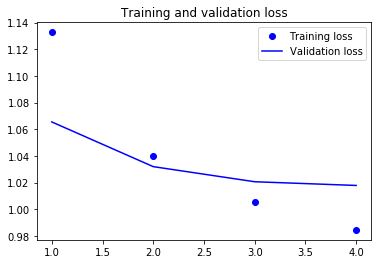

In [25]:
#visualization
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#draw accuracy graph
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#draw loss graph
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
#evaluate on test data
results = model.evaluate(X_test,y_test)
print(results)

121184/121184 [==============================] - 22s 180us/step
[1.015950807298681, 0.5602884869289675]
